## MEDICINE RECOMMENDATION SYSTEM

### Problem Statement

##### With the rapid advancement of technology and the increasing complexity of healthcare needs, the ability to provide personalized medicine recommendations has become crucial. Traditional methods of prescribing medicine rely heavily on the expertise and experience of healthcare professionals, which can sometimes lead to suboptimal or delayed decisions. A data-driven approach to recommending medicines can enhance the precision and efficiency of the treatment process, leading to better patient outcomes.

### Understanding Dataset

##### The Dataset is consisting of the following 9 columns 

- Medicine Name : The specific name of the medication.
- Composition : The active ingredients and their quantities in the medicine.
- Uses : Conditions or diseases the medicine is prescribed for.
- Side Effects : The side effects experienced from taking the medication.
- Image URL : A link to the image of the medicine.
- Manufacturer : The names of the Manufacturer Companies.
- Excellent Review % : Percentage of top-rated reviews.
- Average Review % : Percentage of Average-rated reviews.
- Poor Review % : Percentage of Poor-rated reviews.


#### Obejctive : 
* The main objective from this dataset is to build a recommendation system which can recommend similar medicines based on user inputs. 
* Will be creating two recommendation systems , one by using the column ("Uses") which contains the Use case of the medicines and for another will be merging the ("Uses") column and ("Side Effects") column which contains the sides effects caused by the medicines for similarity based recommendation. 
* User can get recommendations based on Use case similarity and also (Side Effects + use case) <-- combined similarity.
* Will also be creating a CSV file to store all the user inputs and models recommendations to that inputs.
* Will also make use of the Review columns (Excellent , Average and Poor) to curate the results making it to appear from highest to lowest reviewed products. While these approaches really helps customers/viewer/spectator/etc to make decisions and to understand performance of the products in the market.

##### Importing all the necessary libraries for the project

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import pickle
import os
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

##### Reading the CSV medicine dataset 

In [2]:
medDataSet = pd.read_csv("BigMedicalDataSet.csv")

In [3]:
medDataSet.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


##### A quick concise summary using info() 

In [4]:
medDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


Looking at the info() of the dataset there are about 9 columns from which 6 contains object data types "object(6)" whereas other 3 are integer data types "int64(3)". And there are exactly "11825" non-null elements for each 9 columns.

##### Doing a summary of statistics using "describe()" and then transposing it using "T" on the dataset.

In [25]:
medDataSet.describe().T 

,count,mean,std,min,25%,50%,75%,max
Excellent Review %,11825.0,38.516025,25.225343,0.0,22.0,34.0,51.0,100.0
Average Review %,11825.0,35.756364,18.268134,0.0,27.0,35.0,47.0,88.0
Poor Review %,11825.0,25.727611,23.991985,0.0,0.0,22.0,35.0,100.0


The "describe()" have returned statistics for the columns "Excellent Review %" , "Average Review %" and "Poor Review %" which contains integer values.

Count: The count is 11825 for each columns.

Mean: Excellent Reviews column has highest mean compared to rest of the columns with "38.516025" , while Average Reviews column has a mean of "35.756364" and Poor Reviews column has a mean of "25.727611".

Std (Standard Deviation): Measures variability. Excellent Reviews have a high variability (25.225343), indicating diverse review scores. Followed by Poor Review column with "23.991985" and at last Average Review with "18.268134" standard deviation.

Min (Minimum Value): The lowest value recorded for all three review columns is "0.0", suggesting some items received no reviews.

25%, 50%, 75% (Percentiles): These values provide insights into the distribution. For instance, 50% of the data points for Excellent Reviews column are below 34% , while for Average Review it is 35% and for Poor Review column it is 22%.

Max (Maximum Value): The highest percentage for Excellent and Poor Reviews columns are 100%, while for Average Reviews column it's 88%.

##### Using ".isnull().sum()" to identify missing values in the DataFrame and to return the total count of null (NaN) entries for each column.

In [26]:
medDataSet.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

There are no null values in any of the columns 

##### Using ".duplicated().sum()" to check for duplicate rows in a DataFrame and return the total count of duplicates. I

In [27]:
medDataSet.duplicated().sum()

84

There are 84 elements which are duplicates

##### Creating a new DataFrame named "dupMedDataSet" for reviewing the duplicates elements

In [61]:
dupMedDataSet = medDataSet[medDataSet.duplicated()] 

In [62]:
dupMedDataSet.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
780,Aristogyl-F Oral Suspension,Furazolidone (30mg/5ml) + Metronidazole (100mg...,Diarrhea Dysentery,Nausea Headache Dryness in mouth Metallic tast...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Aristo Pharmaceuticals Pvt Ltd,22,28,50
956,Apexitra 200 Capsule,Itraconazole (200mg),Treatment of Fungal infections,Nausea Abdominal pain Constipation Dizziness H...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Apex Laboratories Pvt Ltd,83,17,0
1121,Amyclox-LB-DS Capsule,Amoxycillin (250mg) + Cloxacillin (250mg) + La...,Bacterial infections,Rash Vomiting Allergic reaction Stomach pain N...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Ind Swift Laboratories Ltd,0,0,100
1140,Arthocerin-DG Tablet,Diacerein (50mg) + Glucosamine (1500mg),Osteoarthritis,Nausea Diarrhea Constipation Urine discolorati...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Pulse Pharmaceuticals,44,23,33
1149,Avicaine Oral Topical Solution,Lidocaine (2%),Local anesthesia (Numb tissues in a specific ...,Allergic reaction Application site reactions b...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Avirav Sciences Pvt Ltd,100,0,0


**Observation** :
 
The duplicate values araised due to having same image links for the medicines in the column "Image URL". Other than that there are no duplicates in my obervation. To be honest this will not make any major difference for the project so will be moving ahead. The images for the medicines can be changed under the guidance of product expert which is a mature solution. 

##### Using ".value_counts()" to count the frequency of unique values in a DataFrame column. It's useful for understanding data distribution!

In [30]:
medDataSet.value_counts() 

Medicine Name         Composition                                                           Uses                                                                                           Side_effects                                                                                                                                                                                                                                                                                                                                                                                                                                              Image URL                                                                                                                          Manufacturer                      Excellent Review %  Average Review %  Poor Review %
Nebistar 5 Tablet     Nebivolol (5mg)                                                       Treatment of Hypertension (high blood pressure)Prevention of H

In [31]:
medDataSet["Medicine Name"].value_counts()

Medicine Name
Lulifin Cream            4
Benadryl Syrup           3
Livoluk Oral Solution    3
Nebistar 5 Tablet        3
Amrolstar Cream          3
                        ..
Jubira 10 Tablet         1
Joincerin M  Tablet      1
Jupiros 20 Tablet        1
Joykem ODT 50 Tablet     1
MR Met 500mg Tablet      1
Name: count, Length: 11498, dtype: int64

Taking an insight into "medDataSet["Medicine Name"]" <-- Medicine Names using "value_counts()" 

It is observed that the Medicine Name "Lulifin Cream " appears 4 times which is the highest , 
while "Benadryl Syrup" , "Livoluk Oral Solution" , "Nebistar 5 Tablet" , "Amrolstar Cream " and so appears 3 times. And there any many such medicine names for example "Jubira 10 Tablet " , "Joincerin M  Tablet" , "Jupiros 20 Tablet " , etc which is appearing only 1 time.

Length: (11498): There are (11,498) unique values in the column being analyzed.

dtype: (int64): The data type of the counts is (int64), meaning the counts are stored as 64-bit integers.


##### Using "unique()" to return an array of unique values from the DataFrame column "Medicine Name" . It's useful for quickly identifying all distinct entries in your data!

In [51]:
medDataSet["Medicine Name"].unique()

array(['Avastin 400mg Injection', 'Augmentin 625 Duo Tablet',
       'Azithral 500 Tablet', ..., 'Zipcoz Tablet', 'Zestasil 100 Tablet',
       'Zedruff Shampoo'], dtype=object)

##### Using "unique().shape" to identify the number of dimensions (total length) of the unique values in the (Medicine Name) column.

In [46]:
medDataSet["Medicine Name"].unique().shape  

(11498,)

There are a total of "11,498" unique values in the column "Medicine Name", Simply there are "11,498" unique names.

##### Using "shape" to identify the total dimensions of the "medDataSet" DataFrame

In [43]:
medDataSet.shape

(11825, 9)

There are "11,825" rows and "9" columns in the "medDataSet" DataFrame

#####  Using "columns" to return an Index object containing the column labels of the DataFrame. 


In [5]:
medDataSet.columns 

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

##### Using "rename()" method to change labels (column names) in the "medDataSet" DataFrame.

This is done for the purpose of naming conventions and readability.

In [4]:
medDataSet.rename(columns={'Medicine Name': 'Name'}, inplace=True)
medDataSet.rename(columns={'Image URL': 'image_url'}, inplace=True)
medDataSet.rename(columns={'Excellent Review %': 'exc_review_per'}, inplace=True)
medDataSet.rename(columns={'Average Review %': 'avg_review_per'}, inplace=True)
medDataSet.rename(columns={'Poor Review %': 'poor_review_per'}, inplace=True)

In [5]:
medDataSet.columns

Index(['Name', 'Composition', 'Uses', 'Side_effects', 'image_url',
       'Manufacturer', 'exc_review_per', 'avg_review_per', 'poor_review_per'],
      dtype='object')

The following are our new column names --> (['Name', 'Composition', 'Uses', 'Side_effects', 'image_url', 'Manufacturer', 'exc_review_per', 'avg_review_per', 'poor_review_per'])

### Bar Graph

##### Visualizing the columns "exc_review_per" , "avg_review_per" and "poor_review_per" which contains the review of the medicines using bar graph.

- Initialization: Initializes a figure and axis with a specific size (10x7 inches).
- Data: Sets the bar width and range based on "medDataSet".
- Bars: Plots three sets of bars representing 'Excellent', 'Average', and 'Poor' review percentages in green, yellow, and red, respectively.
- Labels: Adds labels for the y-axis, chart title, and a legend.
- Display: Plots the chart.

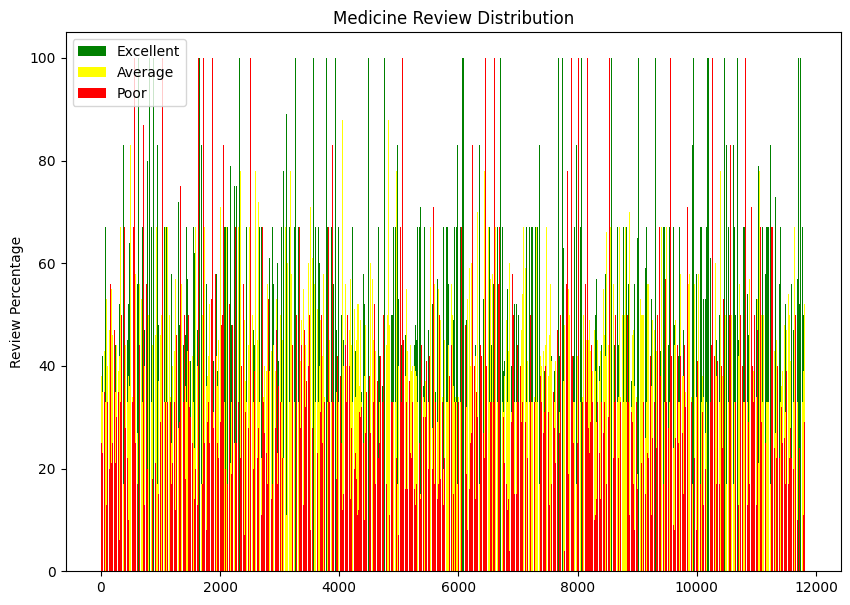

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

barWidth = 0.5
r = range(len(medDataSet))

# Stacked bar chart
ax.bar(r, medDataSet['exc_review_per'], label='Excellent', color='green')
ax.bar(r, medDataSet['avg_review_per'], label='Average', color='yellow')
ax.bar(r, medDataSet['poor_review_per'],  label='Poor', color='red')

# Adding labels and title

ax.set_ylabel('Review Percentage')
ax.set_title('Medicine Review Distribution')
ax.legend()

plt.show()


Observations :

The x-axis represents different medicines (numbered from 0 to 12000), and the y-axis represents the review percentage, ranging from 0% to 100%. 

The reviews are categorized into three types: 1. Excellent (green), 2. Average (yellow), and 3. Poor (red).


Distribution Patterns:
* The graph shows a wide variation in review percentages across different medicines.
* For many medicines, there is a significant portion of poor reviews (red), indicating dissatisfaction or ineffectiveness.
* Some medicines have a higher percentage of excellent reviews (green), suggesting they are well-received.
* The average reviews (yellow) are also present but generally seem to be less frequent compared to poor reviews.

Distribution Of Reviews:
* There are several peaks where the excellent reviews (green) reach close to 100%, indicating that some medicines are highly rated.
* There are medicines with a very high percentage of poor reviews (red), indicating significant dissatisfaction.
* The distribution of reviews is quite scattered, with no clear pattern or trend across the medicines.

Interpretation:
* The variability in the review percentages suggests that the effectiveness and satisfaction with medicines can vary greatly.
* Medicines with a high percentage of excellent reviews might be more effective or have fewer side effects.
* Medicines with a high percentage of poor reviews might be less effective or have more side effects.
* The presence of average reviews indicates a middle ground where the medicine might be satisfactory but not exceptional.



### Histogram

##### Visualizing the columns "exc_review_per" , "avg_review_per" and "poor_review_per" which contains the review of the medicines with histogram.


1. Initializing : Initializes subplots with a shared x-axis and specified figure size of (10,15)inches.
2. Histograms: Plots histograms for 'Excellent', 'Average', and 'Poor' review percentages in green, yellow, and red, respectively.
3. Labels and Grid: Adds titles, y-axis labels, x-axis label (for the last plot), and grids to the histograms.
4. Display: Shows the plots.

This will provide a visual distribution of the different review percentages.


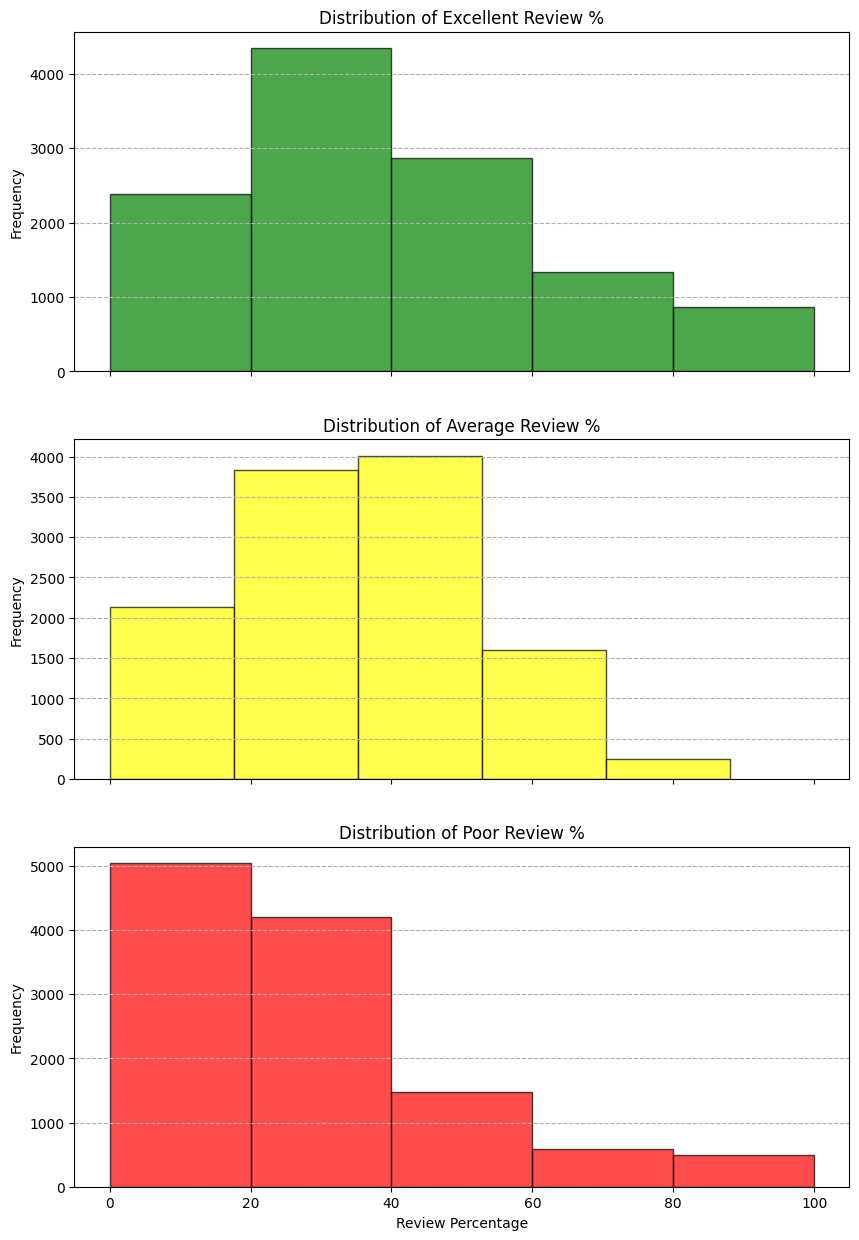

In [40]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Excellent Review Percentage Histogram
axs[0].hist(medDataSet['exc_review_per'], bins=5, color='green', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribution of Excellent Review %')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--')

# Average Review Percentage Histogram
axs[1].hist(medDataSet['avg_review_per'], bins=5, color='yellow', edgecolor='black', alpha=0.7)
axs[1].set_title('Distribution of Average Review %')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y', linestyle='--')

# Poor Review Percentage Histogram
axs[2].hist(medDataSet['poor_review_per'], bins=5, color='red', edgecolor='black', alpha=0.7)
axs[2].set_title('Distribution of Poor Review %')
axs[2].set_xlabel('Review Percentage')
axs[2].set_ylabel('Frequency')
axs[2].grid(axis='y', linestyle='--')

plt.show()



Observations:

Histograms provides a detailed breakdown of the distribution of review percentages for medicines, categorized into three types: Excellent, Average, and Poor. Each histogram represents the frequency of medicines within specific review percentage ranges. 

1. Distribution of Excellent Review %:

* Color: Green
* X-Axis: Review Percentage (ranging from 0% to 100%)
* Y-Axis: Frequency (number of medicines)
* The highest frequency of medicines falls within the 20-40% excellent review range, with frequencies reaching around 4000.
* There is a significant drop in frequency for medicines with excellent review percentages above 40%.
* Very few medicines have excellent review percentages above 80%.
* The distribution is right-skewed.

2. Distribution of Average Review %:

* Color: Yellow
* X-Axis: Review Percentage (ranging from 0% to 100%)
* Y-Axis: Frequency (number of medicines)
* The highest frequency of medicines falls within the 20-40% average review range, with frequencies reaching around 4000.
* Similar to the excellent reviews, there is a significant drop in frequency for medicines with average review percentages above 40%.
* Very few medicines have average review percentages above 60%.
* The distribution is also right-skewed.

3. Distribution of Poor Review %:

* Color: Red
* X-Axis: Review Percentage (ranging from 0% to 100%)
* Y-Axis: Frequency (number of medicines)
* The highest frequency of medicines falls within the 0-20% poor review range, with frequencies reaching around 5000.
* There is a significant drop in frequency for medicines with poor review percentages above 20%.
* Very few medicines have poor review percentages above 60%.
* The distribution is left-skewed.

4. Review Distribution:

* Most medicines tend to have a higher frequency of poor reviews (0-20%) and lower frequencies of excellent and average reviews (20-40%).
* There is a noticeable skew in the distributions, with excellent and average reviews being right-skewed and poor reviews being left-skewed.
* Medicines with very high excellent or average review percentages are rare.
* Medicines with very high poor review percentages are also rare but slightly more frequent than those with very high excellent or average review percentages.


### Correlation Matrix

##### Using "corr()"to calculates the pairwise correlation coefficients between the columns ('exc_review_per', 'avg_review_per', 'poor_review_per'). 

Here we are tying to understanding relationships between variables!

In [6]:
correlation_matrix = medDataSet[['exc_review_per', 'avg_review_per', 'poor_review_per']].corr()
print(correlation_matrix)

                 exc_review_per  avg_review_per  poor_review_per
exc_review_per         1.000000       -0.427963        -0.725545
avg_review_per        -0.427963        1.000000        -0.311464
poor_review_per       -0.725545       -0.311464         1.000000


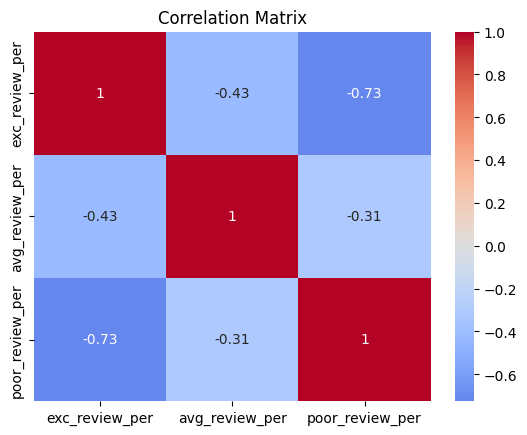

In [7]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


Observation :

Colour Scale: 
The color scale on the right ranges from -1 to 1, 

where:
* Red indicates a positive correlation (values close to 1).
* Blue indicates a negative correlation (values close to -1).
* White/Light colors indicate no or weak correlation (values close to 0).


1.Excellent Review and Average Review: 

* The correlation is -0.428, indicating a negative correlation. When the percentage of excellent reviews increases, the percentage of average reviews tends to decrease ,  and vice versa..


2.Excellent Review and Poor Review: 

* The correlation is -0.726, indicating a strong negative correlation. As the percentage of excellent reviews increases, the percentage of poor reviews tends to decrease significantly , and vice versa..


3.Average Review and Poor Review: 

* The correlation is -0.311, indicating a weak negative correlation. When the percentage of average reviews increases, the percentage of poor reviews slightly tends to decrease , and vice versa..


#### An insight into "Uses" column

In [68]:
medDataSet['Uses'].head()  

0     Cancer of colon and rectum Non-small cell lun...
1                    Treatment of Bacterial infections
2                    Treatment of Bacterial infections
3                        Treatment of Cough with mucus
4    Treatment of Gastroesophageal reflux disease (...
Name: Uses, dtype: object

As we can see the column has a repeated word "Treatment of" which is of no use for our objective also while applying the cosine similarity this word can make the model to wrongly predict the medicines. 

.

### replace()

##### Using "replace()" to substitute specific values in a DataFrame. 

In [7]:
medDataSet['Uses'] = medDataSet['Uses'].str.replace(r'Treatment of', '', case=False, regex=True) 

In [8]:
medDataSet['Uses'].head()

0     Cancer of colon and rectum Non-small cell lun...
1                                 Bacterial infections
2                                 Bacterial infections
3                                     Cough with mucus
4     Gastroesophageal reflux disease (Acid reflux)...
Name: Uses, dtype: object

We have successfully replaced the word "Treatment of" with "" <-- empty string. 

### Assigning Weight 

In our dataset the review columns are in percentage format and to take advantage of such a crucial information from which we can curate the cosine similarity results and also display the ratings for the products could be very beneficial.

To achieve this , here I am assigning weightage to these review columns. Starting by excellent to be 3 followed by average to be 2 and at last poor to be 1.

The main reason or lets say purpose of assigning the weightage to these columns is that doing calculations might not be very convenient for each review columns (excellent , average and poor) and also the distribution of percentage reviews are quite choatic as we can see and this could make confusions moving ahead.

What does the weightage will do is that it will make a quantification and prioritize the relative importance or impact of each category. This will also give one particular range for all the different categories. This formula definitely works well for this dataset but one can surely make changes as per needs.

Higher weights are assigned to "Excellent" (3), then "Average" (2), and "Poor" (1) to prioritize higher review ratings. The specific weights can be adjusted based on the context and desired analysis.

We can also prioritize "Poor" reviews higher, which could assign "Poor" as 3, "Average" as 2, and "Excellent" as 1. It all depends on what aspect we want to emphasize in our analysis.

Hence, moving ahead with "'Excellent': 3, 'Average': 2, 'Poor': 1" weightage as this will prioritize excellent values higher.


In [9]:
# Assign weights 
weights = {'Excellent': 3, 'Average': 2, 'Poor': 1 }

##### Here , I have multiplied the weights with each review columns and added them up than divided with the total of review column. Stored the results in a new column named "score"

In [10]:
medDataSet["score"] = (medDataSet["exc_review_per"]*weights["Excellent"] +
                      medDataSet["avg_review_per"]*weights["Average"] +
                      medDataSet["poor_review_per"]*weights["Poor"] 
                      ) / (
                          medDataSet["exc_review_per"] + 
                          medDataSet["avg_review_per"] +
                          medDataSet["poor_review_per"]
                      )

In [11]:
medDataSet["score"].head()

0    2.00
1    2.29
2    2.18
3    1.89
4    2.05
Name: score, dtype: float64

Finally we got "score" column containing review scores ranging from 3 to 1. Where 3 is the highest excellent ratings and 1 is the lowest poor ratings for the medicine. The more the score leans towards 3 the more excellent review it is for the medicine.

### Histogram

##### Using "hist" to plot histogram graph for the column "score"

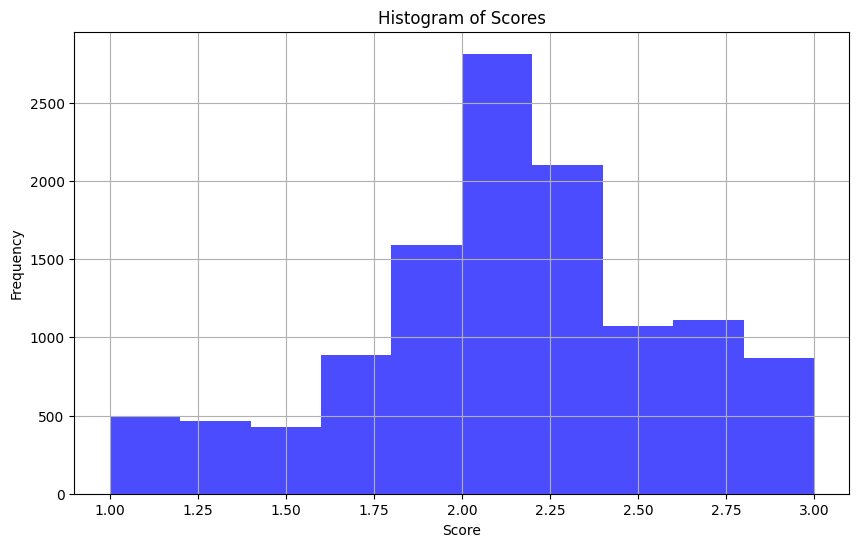

In [104]:
# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(medDataSet["score"], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Obervations: 

X-Axis (Horizontal Axis): Represents the score values, ranging from 1.00 to 3.00.

Y-Axis (Vertical Axis): Represents the frequency, or the number of occurrences, of each score range.

1. Frequency Distribution:

* The highest frequency of scores is in the range of approximately 2.00 to 2.25, with frequencies reaching around 2800.
* The frequency decreases as the score moves away from the peak in both directions (towards lower and higher scores).

2. Skewness:

* The distribution appears to be slightly right-skewed (positively skewed), as the tail on the right side of the peak is longer than the tail on the left side.
* This indicates that while most scores are concentrated around the peak, there are more scores extending towards the higher end (closer to 3.00) than the lower end (closer to 1.00). This indicates that the there are more excellent reviewed medicines.
* There are very few scores in the lowest range (around 1.00 to 1.60) and the highest range (around 2.75 to 3.00), indicating there are more medicine products with excellent reviews between (2.75 to 3,00) whereas there are very less medicine product with poor reviewed raning from (1.00 to 1.60).

3. Central Tendency:

* The peak around the score of 2.00 suggests that this is the most common score, indicating a central tendency around this value.
* This could imply that the majority of the scores are average, with fewer scores being exceptionally high or low.

4. Variability:
* The spread of the scores from 1.00 to 3.00 indicates variability in the data.
* The right-skewed distribution suggests that while most scores are average, there is a wider range of higher scores compared to lower scores.




### Bar Graph

##### Using 'bar' graph to plot graphical representation of score column


Initialization: Initializes a figure with a size of 10x6 inches.

Data Plotting: Counts unique values in the score column, sorts them, and plots a bar chart in red with 70% opacity.

Title and Labels: Adds a title "Bar Plot of Scores," labels for the x-axis (Score) and y-axis (Count).

X-Ticks: Sets x-ticks at intervals of 3 for better readability.

Grid: Adds a grid to the plot for better visualization.

Display: Plots the bar graph.


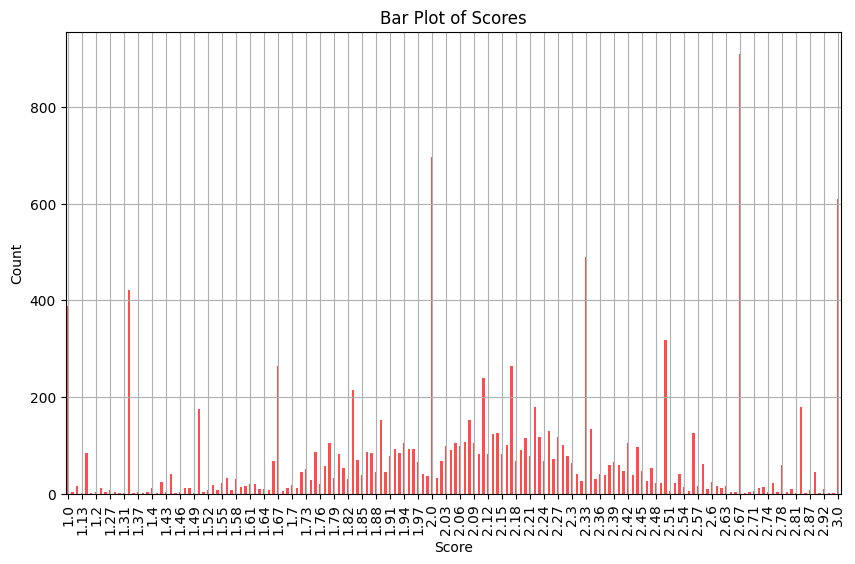

In [127]:
# Plotting Bar Plot
plt.figure(figsize=(10, 6))
medDataSet["score"].value_counts().sort_index().plot(kind='bar', color='red', alpha=0.7)
plt.title('Bar Plot of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(range(0,len(medDataSet["score"].unique()),3))
plt.grid(True)
plt.show()


Observations: 

X-Axis (Horizontal): "Score":
The x-axis represents the different score values. The scores range from 1.0 to 3.0, 

Y-Axis (Vertical): "Count"
The y-axis represents the count or frequency of each score. The counts range from 0 to 900.


### Boxplot 

##### Using "boxplot" to plot a boxplot to visualize the "score" column 

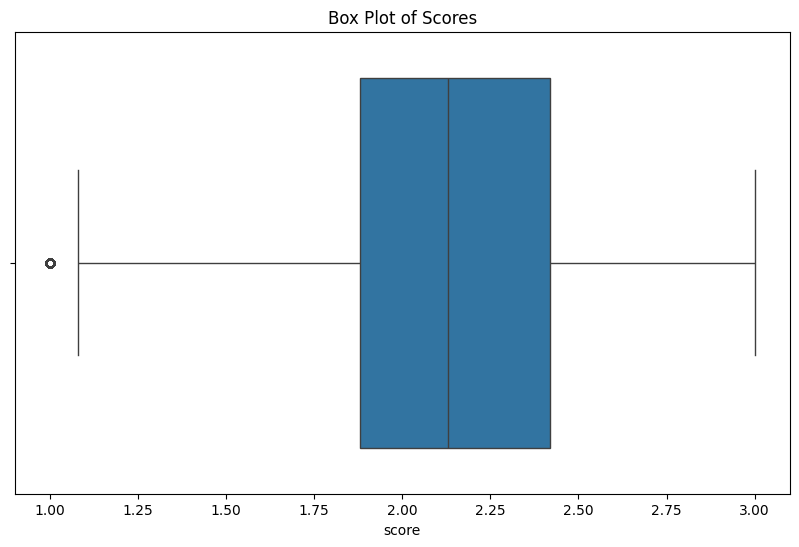

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=medDataSet["score"])
plt.title('Box Plot of Scores')
plt.show() 


Observations: 

X-Axis (Horizontal): "score":
The x-axis represents the range of score values. The scores range from 1.00 to 3.00.

1.Interquartile Range (IQR):
* The left edge of the box (around 1.85) represents the first quartile (Q1), which is the 25th percentile of the data.
* The right edge of the box (around 2.45) represents the third quartile (Q3), which is the 75th percentile of the data.
* The width of the box indicates the spread of the middle 50% of the scores.
* The interquartile range (IQR) is from approximately 1.85 to 2.45, indicating that the middle 50% of the scores fall within this range.

2.Outliers:
* There is one outlier with a score of approximately 1.00.

3.Central Tendency:
* The median score is around 2.20, indicating that half of the scores are below 2.20 and half are above 2.20.

4.Skewness:
* The box plot suggests a slight left skew (negative skew) because the left whisker is longer than the right whisker, and the median is closer to the left edge of the box.
* This indicates that there are more lower scores pulling the distribution to the left.



### Creating a Set of Stopwords

creates a set of common English stop words that are often removed during text processing to focus on more meaningful words.

In [12]:
STOPWORDS = set(stopwords.words('english'))

### Stemming Function

1. Initializes a PorterStemmer.

2. Loops throught the given input.

3. Cleans the text by removing non-alphabet characters using Regular Expression.

4. Converts the text to lowercase and splits it into words.

5. Removes stopwords and stems the remaining words.

6. Joins the processed words back into a single string.

In [13]:
def stem(text):
  stemmer = PorterStemmer()
  for i in range(0, len(text)):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    return ' '.join(review)

### Applying Stemming Function

Applying stem function to each entry in the 'Uses' column and stores the results in a new column named 'tags'. It's used for text preprocessing.

In [74]:
medDataSet['tags'] = medDataSet['Uses'].apply(stem) 

In [75]:
medDataSet['tags'].head() 

0    cancer colon rectum non small cell lung cancer...
1                                       bacteri infect
2                                       bacteri infect
3                                           cough mucu
4    gastroesophag reflux diseas acid reflux peptic...
Name: tags, dtype: object

.

### TfidfVectorizer

TfidfVectorizer is used to convert text data into numerical features based on Term Frequency-Inverse Document Frequency. It's useful for analyzing the importance of words in documents.

In the below code creating a TF-IDF Vectorizer with a maximum of 5,000 features. It's used to transform text data into numerical features based on Term Frequency-Inverse Document Frequency, focusing on the most important terms.

In [76]:
tfIDF = TfidfVectorizer(max_features=5000) 

In [81]:
tfIDF

TfidfVectorizer(max_features=5000)

### Getting Feature Names

Using "get_feature_names_out()" to return an array of the feature names (terms) extracted by the TF-IDF Vectorizer. It's useful for understanding which terms are included in the vectorization process.

In [89]:
tfIDF.get_feature_names_out() 

array(['abdomin', 'abnorm', 'acid', 'acidosi', 'acn', 'acromegali',
       'actin', 'acut', 'addict', 'affect', 'age', 'agent', 'al',
       'alcohol', 'alkalin', 'allerg', 'allergi', 'alzheim', 'amenorrhea',
       'amoebiasi', 'amyotroph', 'anaesthesia', 'anal', 'anemia',
       'anesthesia', 'angina', 'angioedema', 'ankylos', 'anovul',
       'anxieti', 'aplast', 'appetit', 'area', 'around', 'arrest',
       'arrhythmia', 'arrhythmiaprevent', 'arteri', 'arteriosu',
       'arthralgia', 'arthriti', 'associ', 'asthma', 'ataxia', 'atop',
       'attack', 'attackprevent', 'attacktreat', 'autoimmun', 'bacteri',
       'balanc', 'basal', 'bed', 'benign', 'benzodiazepin', 'better',
       'biliari', 'bipolar', 'bite', 'bladder', 'bleed', 'bloat', 'block',
       'blood', 'bone', 'bowel', 'bradycardia', 'brain', 'breast',
       'bronchiti', 'bump', 'burn', 'calcium', 'cancer', 'cancersprevent',
       'carcinoid', 'cardiac', 'carnitin', 'caviti', 'cell', 'certain',
       'cervic', 'chemic

### Converting Text to Vectors

Transforming the 'tags' column text data into numerical vectors using the TF-IDF Vectorizer and converts the result to an array.

In [77]:
vectors = tfIDF.fit_transform(medDataSet['tags']).toarray() 

In [87]:
print("vectors :- \n ",vectors[0])

vectors :- 
  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.21434297 0.         0.         0.         0.
 0.         0.70323388 0.         0.         0.         0.
 0.         0.1969749  0.         0.24924103 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.23552052 0.      

##### An Insight Into "vectors"

In [88]:
print("vectors.shape :- ",vectors.shape)
print("len(vectors).shape :- ",len(vectors))
print("vectors.ndim :- ",vectors.ndim)  

vectors.shape :-  (11825, 580)
len(vectors).shape :-  11825
vectors.ndim :-  2


### Calculating Cosine Similarity

Computing the cosine similarity between the numerical vectors, measuring how similar the documents are to each other.

In [90]:
similarity = cosine_similarity(vectors) 

In [96]:
print("similarity :- \n ",similarity)

similarity :- 
  [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]


##### An Insight Into "similarity"

In [91]:
print("similarity.shape :- ",similarity.shape) 
print("len(similarity).shape :- ",len(similarity))
print("similarity.ndim :- ",similarity.ndim)

similarity.shape :-  (11825, 11825)
len(similarity).shape :-  11825
similarity.ndim :-  2


In [94]:
similarity[1]

array([0., 1., 1., ..., 0., 0., 0.])

### Creating A Combined Column Of "Uses" And "Side_effects"

Adding columns "Uses" and "Side_effects" and storing it into a new columns "usesAndSideEffect". This is useful for finding medicines with similar Use Case while having similar Side Effects. This is going to be our second column on which we will conduct cosine similary for recommendation objective.


In [14]:
medDataSet["usesAndSideEffect"]  =  medDataSet["Uses"] + medDataSet["Side_effects"]


In [15]:
medDataSet["usesAndSideEffect"].tail()

11820     Hypertension (high blood pressure)Dizziness T...
11821     Polycystic ovarian syndrome (PCOS)Rash Nausea...
11822     Erectile dysfunctionFlushing sense of warmth ...
11823     DandruffApplication site reactions burning ir...
11824     DandruffApplication site reactions burning ir...
Name: usesAndSideEffect, dtype: object

In [16]:
medDataSet.columns

Index(['Name', 'Composition', 'Uses', 'Side_effects', 'image_url',
       'Manufacturer', 'exc_review_per', 'avg_review_per', 'poor_review_per',
       'score', 'usesAndSideEffect'],
      dtype='object')

After the series of operations over the DataFrame we have now added up a few more new columns which are "score" and "usesAndSideEffect". No we have about 11 columns in total.

.

### Applying Stemming Function

Applying stem function to each entry in the 'usesAndSideEffect' column and stores the results in a new column named 'tagsForUsesAndSideEffect'. It's used for text preprocessing.

In [17]:
medDataSet['tagsForUsesAndSideEffect'] = medDataSet['usesAndSideEffect'].apply(stem)

In [18]:
medDataSet["usesAndSideEffect"].tail()

11820     Hypertension (high blood pressure)Dizziness T...
11821     Polycystic ovarian syndrome (PCOS)Rash Nausea...
11822     Erectile dysfunctionFlushing sense of warmth ...
11823     DandruffApplication site reactions burning ir...
11824     DandruffApplication site reactions burning ir...
Name: usesAndSideEffect, dtype: object

We have successfully added and stemmed "usesAndSideEffect" which contains both the use case and side effects of the medicines.

.

### TF-IDF Vectorizer

Creating a TF-IDF Vectorizer with a maximum of 5,000 features. It's used to transform text data into numerical features based on Term Frequency-Inverse Document Frequency, focusing on the most important terms.

In [19]:
tfIDFsideEffect = TfidfVectorizer(max_features=5000)  

In [20]:
tfIDFsideEffect 

TfidfVectorizer(max_features=5000)

### Getting Feature Names

Using "get_feature_names_out()" to return an array of the feature names (terms) extracted by the TF-IDF Vectorizer.

In [22]:
tfIDFsideEffect.get_feature_names_out() 

array(['abdomin', 'abnorm', 'absenc', ..., 'yellow', 'zolling',
       'zosterheadach'], dtype=object)

### Converting Text to Vectors

Transforming the 'tagsForUsesAndSideEffect' column text data into numerical vectors using the TF-IDF Vectorizer and converts the result to an array. 

In [21]:
vectorsSideEffect = tfIDFsideEffect.fit_transform(medDataSet['tagsForUsesAndSideEffect']).toarray()

##### An Insight Into "vectorsSideEffect"

In [23]:
print("vectorsSideEffect.shape :- ",vectorsSideEffect.shape)
print("len(vectorsSideEffect).shape :- ",len(vectorsSideEffect)) 
print("vectorsSideEffect.ndim :- ",vectorsSideEffect.ndim) 

vectorsSideEffect.shape :-  (11825, 1809)
len(vectorsSideEffect).shape :-  11825
vectorsSideEffect.ndim :-  2


.

### Calculating Cosine Similarity

Computing the cosine similarity between the numerical vectors, measuring how similar the documents are to each other.

In [25]:
similaritySideEffect = cosine_similarity(vectorsSideEffect) 

In [26]:
print("similaritySideEffect :- \n ",similaritySideEffect)

similaritySideEffect :- 
  [[1.         0.         0.01221422 ... 0.03044416 0.         0.        ]
 [0.         1.         0.22145734 ... 0.01921974 0.         0.        ]
 [0.01221422 0.22145734 1.         ... 0.0247759  0.         0.        ]
 ...
 [0.03044416 0.01921974 0.0247759  ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]]


##### An Insight Into "similaritySideEffect"

In [27]:
print("similaritySideEffect.shape :- ",similaritySideEffect.shape)
print("len(similaritySideEffect).shape :- ",len(similaritySideEffect))
print("similaritySideEffect.ndim :- ",similaritySideEffect.ndim) 

similaritySideEffect.shape :-  (11825, 11825)
len(similaritySideEffect).shape :-  11825
similaritySideEffect.ndim :-  2


### Recommendation Function

This function will take user input while doing cosine similarity upon the given input and checks for the availability of the medicine in the dataset and if yes than will recommend the medicines based on its similarity of use case which will again will be sorted based on the review scores and curating/displaying it by highest to lowest from right to left. 

In [217]:
def recommendation(medicine):
    
    try:
        medicine_index = medDataSet[medDataSet['Name'] == medicine].index[0]
        distance = similarity[medicine_index]
        medicine_list = list(enumerate(distance))
        sorted_medicine_list = sorted(medicine_list, reverse=True, key=lambda x: x[1])[1:6]
        
        top_medicines = {}
        seen = set()
        
        for i in sorted_medicine_list:
            if len(top_medicines) >= 5:
                break
            
            if medDataSet.iloc[i[0]].Name not in seen:
                top_medicines[medDataSet.iloc[i[0]].Name] = {
                    'review_score': medDataSet.iloc[i[0]].score,
                    'Manufacturer': medDataSet.iloc[i[0]].Manufacturer
                }
                
                seen.add(medDataSet.iloc[i[0]].Name)
    
        sorted_top_medicines = dict(sorted(top_medicines.items(), key=lambda item: item[1]['review_score'], reverse=True))
        
        
        for name, score  in sorted_top_medicines.items():
            print(f"Medicine: {name} || Review Score: {score['review_score']} || Manufacturer: {score['Manufacturer']}")
    
    except Exception as e:
        print("No Such Input Found")


In [218]:
recommendation("Ascoril D Plus Syrup Sugar Free") 

Medicine: Ascoril D Junior Cough Syrup || Review Score: 2.02 || Manufacturer: Glenmark Pharmaceuticals Ltd
Medicine: Asthakind-DX Syrup Sugar Free || Review Score: 1.96 || Manufacturer: Mankind Pharma Ltd
Medicine: Alex Syrup || Review Score: 1.95 || Manufacturer: Glenmark Pharmaceuticals Ltd
Medicine: Alex Junior Syrup || Review Score: 1.94 || Manufacturer: Glenmark Pharmaceuticals Ltd
Medicine: Alex Cough Lozenges Lemon Ginger || Review Score: 1.67 || Manufacturer: Glenmark Pharmaceuticals Ltd


### Similarity Recommendation for (Use Case + Side Effect) 

In [32]:
def recommendationSideEffect(medicine):
    
    try:
        medicine_index = medDataSet[medDataSet['Name'] == medicine].index[0]
        distance = similaritySideEffect[medicine_index]
        medicine_list = list(enumerate(distance))
        sorted_medicine_list = sorted(medicine_list, reverse=True, key=lambda x: x[1])[1:6]
        
        top_medicines = {}
        seen = set()
        
        for i in sorted_medicine_list:
            if len(top_medicines) >= 5:
                break
            
            if medDataSet.iloc[i[0]].Name not in seen:
                top_medicines[medDataSet.iloc[i[0]].Name] = {
                    'review_score': medDataSet.iloc[i[0]].score,
                    'Manufacturer': medDataSet.iloc[i[0]].Manufacturer
                }
                
                seen.add(medDataSet.iloc[i[0]].Name)
    
        sorted_top_medicines = dict(sorted(top_medicines.items(), key=lambda item: item[1]['review_score'], reverse=True))
        
        
        for name, score  in sorted_top_medicines.items():
            print(f"Medicine: {name} || Review Score: {score['review_score']} || Manufacturer: {score['Manufacturer']}")
    
    except Exception as e:
        print("No Such Input Found")


In [33]:
recommendationSideEffect("Ascoril D Plus Syrup Sugar Free")

Medicine: Alkof Junior Syrup || Review Score: 2.08 || Manufacturer: Alkem Laboratories Ltd
Medicine: Alex Syrup Sugar Free || Review Score: 2.03 || Manufacturer: Glenmark Pharmaceuticals Ltd
Medicine: Ascoril D Junior Cough Syrup || Review Score: 2.02 || Manufacturer: Glenmark Pharmaceuticals Ltd
Medicine: Asthakind-DX Syrup Sugar Free || Review Score: 1.96 || Manufacturer: Mankind Pharma Ltd
Medicine: Alex Syrup || Review Score: 1.95 || Manufacturer: Glenmark Pharmaceuticals Ltd


### Creating path for pickle files

In [28]:
folder_name = 'pickle_files'
os.makedirs(folder_name, exist_ok=True)

##### Created and dumped pickle for "similarity" , "medDataSet" and "similaritySideEffect" into the pickle path named "picke_files" <- folder 

In [200]:
pickle.dump(similarity, open(os.path.join(folder_name, 'similarityWeightAssign.pkl'), 'wb'))
pickle.dump(medDataSet, open(os.path.join(folder_name, 'medDataSet.pkl'), 'wb'))
pickle.dump(similaritySideEffect, open(os.path.join(folder_name, 'similaritySideEffect.pkl'), 'wb'))

.

### Creating Home Page HTML site where all the medicines will be showed. Using python os module to create templates folder and writing the html content into it.

In [15]:
# Read the CSV file
df = pickle.load(open("pickle_files/medDataSet.pkl","rb"))  

# Specifying the column names that contain the medicine names and image URLs
name_column = 'Name'
url_column = 'image_url'
scores = "score"
mft = "Manufacturer"
usedFor = "Uses"
sideEffects = "Side_effects"

# Extract the medicines names and URLs from the DataFrame
medicines = df[[name_column, url_column , scores , mft , usedFor , sideEffects]].to_dict(orient='records')

# Creatinh the HTML content with embedded JavaScript
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Medicine Recommendation</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
    <style>
        html {{
            font-family: 'Roboto', sans-serif;
        }}

        .product-container {{
            display: flex;
            flex-wrap: wrap;
        }}

        .product-item {{
            flex: 1 1 calc(20% - 20px);
            box-sizing: border-box;
            margin: 10px;
            text-align: center;
        }}

        .product-item img {{
            max-width: 200px;
            height: 200px;
            cursor: pointer; 
        }}

        .product-item h3 {{
            margin-top: 5px;
        }}

        .pagination {{
            text-align: center;
            margin-top: 20px;
        }}

        .pagination button {{
            margin: 5px;
        }}

        /* Modal styles */
        .modal {{
            display: none;
            position: fixed;
            z-index: 1;
            left: 0;
            top: 0;
            width: 100%;
            height: 100%;
            overflow: auto;
            background-color: rgb(0,0,0);
            background-color: rgba(0,0,0,0.4);
        }}

        .modal-content {{
            margin: 15% auto;
            padding: 20px;
            border: 1px solid #888;
            width: 100%;
            max-width: 400px;
            background-color: white;
            display:flex;
            flex-direction: column;
            align-items: center;
        }}

        .close {{
            color: #aaa;
            float: right;
            font-size: 28px;
            font-weight: bold;
            position: absolute;
            top: 10px;
            right:20px;
        }}

        .close:hover,
        .close:focus {{
            color: black;
            text-decoration: none;
            cursor: pointer;
        }}

        
        nav {{
            background-color: #b3b0b0;
            color: white;
            padding: 10px 0;

        }}

        nav ul {{
            list-style-type: none;
            display: flex;
            justify-content: center;
        }}

        nav ul li {{
            margin: 0 20px;
        }}

        nav ul li a {{
            color: #000000;
            text-decoration: none;
            font-size: 18px;
        }}

        nav ul li a:hover {{
            text-decoration: underline;
        }}

        .centered-heading {{
            display: flex;
            justify-content: center;
            align-items:  center;
            height:  100px; 
        }}

        .centered-heading h1 {{
            font-size:  2.5em;
            text-align: center;
        }}



    </style>
</head>
<body>
      <nav class="navbar"> 
        <ul> 
            <li>
                <a href="/recommendation">Get Your Recommendation</a>
            </li> 

            <li>
                <a href="/contact">Contact</a>
            </li> 
        </ul> 
    </nav> 

    <div class="centered-heading"> <h1>Medicine Recommendation</h1> </div>

    <div class="centered-heading"> 
    <h3>Please consider that the review score is calculated based on overall ratings whereas 
    3 is the uptmost excellent quality reviewed by customers and 1 means poor quality reviewed by customers, Thanks.
    </h3> </div>

    <div class="product-container" id="productContainer"></div>
    <div class="pagination" id="pagination"></div>



    <!-- The Modal -->
    <div id="myModal" class="modal">
        <div class="modal-content">
            <span class="close">&times;</span>
            <img id="modalImage" src="" alt="Medicine Image" style="width: 200px; height: 200px;">
            <h3 id="modalTitle"></h3>
        </div>
    </div>

    <script>
        // Array of medicines names and image URLs
        const medicinesHTML = {medicines};

        const itemsPerPage = 200;
        let currentPage = 1;

        const displayProducts = (page) => {{
            const container = document.getElementById('productContainer');
            container.innerHTML = ''; // Clear the container
            const start = (page - 1) * itemsPerPage;
            const end = start + itemsPerPage;
            const paginatedItems = medicinesHTML.slice(start, end);

            paginatedItems.forEach(medIntoDic => {{
                const item = document.createElement('div');
                item.className = 'product-item';
                item.innerHTML = `
                    <img src="${{medIntoDic['{url_column}']}}" alt="${{medIntoDic['{name_column}']}}" loading="lazy" 
                    onclick="showModal('${{medIntoDic['{url_column}']}}', '${{medIntoDic['{name_column}']}}')">

                    <h3> Medicine Name :  ${{medIntoDic['{name_column}']}}</h3>
                    <h4> Used For : ${{medIntoDic['{usedFor}']}} </h4>
                    <h4> Side Effects : ${{medIntoDic['{sideEffects}']}} </h4>
                    <h4> Review Scores : ${{medIntoDic['{scores}']}}</h4>
                    <h4> Manufacturer : ${{medIntoDic['{mft}']}}</h4>
                `;
                container.appendChild(item);
            }});
        }};

        const setupPagination = () => {{
            const pagination = document.getElementById('pagination');
            const totalPages = Math.ceil(medicinesHTML.length / itemsPerPage);
            pagination.innerHTML = ''; // Clear pagination

            for (let i = 1; i <= totalPages; i++) {{
                const button = document.createElement('button');
                button.textContent = i;
                button.onclick = () => {{
                    currentPage = i;
                    displayProducts(currentPage);
                }};
                pagination.appendChild(button);
            }}
        }};

        const showModal = (imgSrc, title) => {{
            const modal = document.getElementById("myModal");
            const modalImg = document.getElementById("modalImage");
            const modalTitle = document.getElementById("modalTitle");
            modal.style.display = "block";
            modalImg.src = imgSrc;
            modalTitle.textContent = title;
        }};

        const closeModal = () => {{
            const modal = document.getElementById("myModal");
            modal.style.display = "none";
        }};

        // Initialize the gallery
        displayProducts(currentPage);
        setupPagination();

        // Get the <span> element that closes the modal
        const span = document.getElementsByClassName("close")[0];
        span.onclick = closeModal;

        // Close the modal when clicking anywhere outside of the modal content
        window.onclick = function(event) {{
            const modal = document.getElementById("myModal");
            if (event.target == modal) {{
                closeModal();
            }}
        }};
    </script>
</body>
</html>
"""

folder_name = 'templates'
os.makedirs(folder_name, exist_ok=True)

filePath = os.path.join(folder_name,'home.html')

# Saving the HTML content to a file
with open(filePath, 'w') as file:
    file.write(html_content)

print('HTML file created successfully.')


HTML file created successfully.


### Creating HTML Contact Page 

##### Used python os module to create the file 

In [35]:
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
    <title>Contact Us</title>
    <style>

        html {{
            font-family: 'Roboto', sans-serif;
        }}

        body {{
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
        }}

        nav {{
            background-color: #333;
            color: white;
            padding: 10px 0;
        }}

        nav ul {{
            list-style-type: none;
            display: flex;
            justify-content: center;
        }}

        nav ul li {{
            margin: 0 20px;
        }}

        nav ul li a {{
            color: white;
            text-decoration: none;
            font-size: 18px;
        }}

        nav ul li a:hover {{
            text-decoration: underline;
        }}

        .centered-heading {{
            display: flex;
            justify-content: center;
            align-items: center;
            height: 30vh; 
        }}

        .centered-heading h1 {{
            font-size: 2.5em;
            text-align: center;
        }}

        .container {{
            max-width: 600px;
            margin: 20px auto;
            padding: 20px;
            background-color: white;
            border-radius: 5px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }}

        .container h3 {{
            text-align: center;
            margin-bottom: 20px;
        }}

    </style>
</head>
<body>
    <!-- Navbar -->
    <nav>
        <ul>
            <li><a href="http://127.0.0.1:5000/">Home</a></li> 
            <li><a href="/recommendation">Get Your Recommendation</a></li>
        </ul>
    </nav>

    <!-- Centered Heading -->
    <div class="centered-heading">
        <h1>Contact Details</h1>
    </div>

    <!-- Contact Form Container -->
    <div class="container">

        <h3>Greetings</h3>
        <p> I welcome you to my Medicine Recommendation System portfolio project!</p>
        <p> My name is Sambhu Yadav and I am delighted to showcase this project.</p>
        <p> Thank you for exploring this project. </p>
        <p> I am always open to professional connections , feedbacks and suggestions. </p>  
        <p> Please reach out to me at "sambhuy306@gmail.com"</p>
        <p> Very Much Thanks for visiting! Your thoughts and insights are appreciated. </p>
    
    </div>

</body>
</html>

"""



# Saving the HTML content to a file
with open('templates/contact.html', 'w') as file:
    file.write(html_content)

print('HTML contact file created successfully.')


HTML contact file created successfully.


### Creating a flask app python file

##### Used python os module to create this file

In Flask app the core logic lies for displaying the HTML web sites and the recommendation to happen.

I have also added the functionality of storing the user inputs into a csv file which is in the app.py the flask python file.

The csv file will store the following "user_input_text , suggested_names , results , timestamp". <-- Here, suggested_names column will contain the recommendation systems results which the model have showed for every medicine inputs.

In [230]:

python_file = """ 


from flask import Flask , render_template , request , flash
import pickle
import os
import csv
import json
from datetime import datetime
import pytz

newMedData12 = pickle.load(open('pickle_files/medDataSet.pkl','rb'))
similarity = pickle.load(open('pickle_files/similarityWeightAssign.pkl','rb'))
similaritySideEffect = pickle.load(open('pickle_files/similaritySideEffect.pkl','rb'))



app = Flask(__name__)

# Flash Message
app.secret_key = 'message'

# Path for csv file 
csv_folder = 'csv_input_files'
if not os.path.exists(csv_folder):
    os.makedirs(csv_folder)
csv_file_path = os.path.join(csv_folder , "user_inputs_data.csv")
# Creating CSV file with Two Columns one with name and another with timestamp
if not os.path.exists(csv_file_path):
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file) 
        writer.writerow(['user_input_text','suggested_names','results','timestamp'])




@app.route('/')
def index():
    return render_template('home.html')


@app.route('/recommendation')
def recommend_page():
    return render_template('recommendation.html')


@app.route('/contact')
def contact_page():
    return render_template('contact.html')


@app.route('/recommend_action',methods=['POST'])
def recommendation():
    try:
        medicine = request.form.get('user_input')
        medicine = medicine.strip()
        medicine_index = newMedData12[newMedData12['Name'] == medicine].index[0]
        distance = similarity[medicine_index]
        medicine_list = list(enumerate(distance))
        sorted_medicine_list = sorted(medicine_list, reverse=True, key=lambda x: x[1])[1:6]

        top_medicines = {}
        seen = set()
        
        for i in sorted_medicine_list:
            if len(top_medicines) >= 5:
                break
            
            if newMedData12.iloc[i[0]].Name not in seen:
                top_medicines[newMedData12.iloc[i[0]].Name] = {
                    'image_url': newMedData12.iloc[i[0]]["image_url"],
                    'usedFor' : newMedData12.iloc[i[0]].Uses,
                    'sideEffect' : newMedData12.iloc[i[0]].Side_effects,
                    'review_score' : newMedData12.iloc[i[0]].score,
                    'mft' : newMedData12.iloc[i[0]].Manufacturer
                }
            
                seen.add(newMedData12.iloc[i[0]].Name)
    
        sorted_top_medicines = dict(sorted(top_medicines.items(), key=lambda item: item[1]['review_score'], reverse=True))


        medicine_names = ', '.join(sorted_top_medicines.keys())
        sorted_top_medicines_JSON = json.dumps(sorted_top_medicines)
        # Storing user inputs into a csv file with current date and time 
        timeZone = pytz.timezone('Asia/Kolkata')
        timestamp = datetime.now(timeZone).strftime('%d-%m-%Y %H:%M:%S')
        with open(csv_file_path,mode="a",newline='') as file:
            writer = csv.writer(file)
            writer.writerow([medicine , medicine_names , sorted_top_medicines_JSON , timestamp])
        


        return render_template("recommendation.html",sorted_top_medicines=sorted_top_medicines)
    

    except Exception as e: 
        flash("No Such Input Found , please retry with avaiable names in the Dataset , thanks ;-)") 

    return render_template("recommendation.html", sorted_top_medicines={}) 




# Side Effect Code ---------------------------------------------------------------------------



@app.route('/recommend_sideEffect',methods=['POST'])
def recommendationSideEffect():
    try:
        medicine = request.form.get('side_effect')
        medicine = medicine.strip()
        medicine_index = newMedData12[newMedData12['Name'] == medicine].index[0]
        distance = similaritySideEffect[medicine_index]
        medicine_list = list(enumerate(distance))
        sorted_medicine_list = sorted(medicine_list, reverse=True, key=lambda x: x[1])[1:6]


        
        top_medicines = {}
        seen = set()
        
        for i in sorted_medicine_list:
            if len(top_medicines) >= 5:
                break
            
            if newMedData12.iloc[i[0]].Name not in seen:
                top_medicines[newMedData12.iloc[i[0]].Name] = {
                    'image_url': newMedData12.iloc[i[0]]["image_url"],
                    'usedFor' : newMedData12.iloc[i[0]].Uses,
                    'sideEffect' : newMedData12.iloc[i[0]].Side_effects,
                    'review_score' : newMedData12.iloc[i[0]].score,
                    'mft' : newMedData12.iloc[i[0]].Manufacturer
                }
            
                seen.add(newMedData12.iloc[i[0]].Name)
    
        sorted_top_medicines_side_effects = dict(sorted(top_medicines.items(), key=lambda item: item[1]['review_score'], reverse=True))

        medicine_names = ', '.join(sorted_top_medicines_side_effects.keys())
        sorted_top_medicines_JSON = json.dumps(sorted_top_medicines_side_effects)
        # Storing user inputs into a csv file with current date and time 
        timeZone = pytz.timezone('Asia/Kolkata')
        timestamp = datetime.now(timeZone).strftime('%d-%m-%Y %H:%M:%S')
        with open(csv_file_path,mode="a",newline='') as file:
            writer = csv.writer(file)
            writer.writerow([medicine , medicine_names , sorted_top_medicines_JSON , timestamp])



        return render_template("recommendation.html",sorted_top_medicines_side_effects=sorted_top_medicines_side_effects)
    

    except Exception as e: 
        flash("No Such Input Found , please retry with avaiable names in the Dataset , thanks ;-)") 

    return render_template("recommendation.html", sorted_top_medicines_side_effects={}) 




if __name__ == '__main__':
    app.run(debug=True)


"""


# Saving the HTML content to a file
with open('app.py', 'w') as file:
    file.write(python_file)

print('Python Flask File created successfully.')


Python Flask File created successfully.


### Created HTML Recommendation Page
##### Used python os module to make the html file.

In [231]:
recommendation_html = """



<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Product Recommendation</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet" rel="stylesheet">
    <style>

        html{
            font-family: 'Robto', sans-serif;
        }

        body { 
            margin: 0;
            padding: 0;
            background-color: #f4f4f4;
        }

        .container {
            background-color: white;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            text-align: center;
        }

        .sideEffect_container{
            background-color: white;
            padding: 50px;
            text-align: center;
        }
        

        .input-group {
            margin-bottom: 20px;
        }
        .input-group label {
            display: block;
            margin-bottom: 5px;
        }
        .input-group input {
            padding: 10px;
            width: 900px;
            box-sizing: border-box;
        }



        /* Input Side Effect CSS Code */
        .input-group-sideEffect {
            margin-bottom: 20px;
        }
        .input-group-sideEffect label {
            display: block;
            margin-bottom: 5px;
        }
        .input-group-sideEffect input {
            padding: 10px;
            width: 900px;
            box-sizing: border-box;
        }


        .product-container{
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            
        }

        .product-container-sideEffect{
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
        }

        .product-item{
            margin:10px;
            padding:10px;
            border: 1px solid #ddd;
            border-radius: 5px;
            text-align: center;
            cursor: pointer; 
        }

        .product-item-sideEffect{
            margin:10px;
            padding:10px;
            border: 1px solid #ddd;
            border-radius: 5px;
            text-align: center;
            cursor: pointer; 
        }


        nav {
            background-color: #b3b0b0;
            color: white;
            padding: 10px 0;

        }

        nav ul {
            list-style-type: none;
            display: flex;
            justify-content: center;
        }

        nav ul li {
            margin: 0 20px;
        }

        nav ul li a {
            color: #000000;
            text-decoration: none;
            font-size: 18px;
        }

        nav ul li a:hover {
            text-decoration: underline;
        }

        .centered-heading{
            display: flex;
            justify-content: center;
            align-items:  center;
            height:  100px; 
        }

        .centered-heading h1 {
            font-size:  2.5em;
            text-align: center;
        }

        .flash{
            color: red;
            text-align: center;
            margin: 20px 0;
        }
   
    </style>
</head>


<body>

    <nav class="navbar"> 
        <ul> 
            <li>
                <a href="http://127.0.0.1:5000/">Home</a>
            </li> 

            <li>
                <a href="/contact">Contact</a>
            </li> 
        </ul> 
    </nav> 



    <div class="container">

        <div class="centered-heading"> <h1>Medicine Recommendation</h1> </div>

        <form action="/recommend_action" id="recommendationForm" method="POST">
            <div class="input-group">
                <label for="product_name">Enter Medicine Name:</label>
                <input name="user_input" placeholder="Enter Medicines Here" type="text" id="product_name" required>
            </div>
            <button type="submit">Get Recommendation</button>
        </form>



    <!-- Flash Messages --> 
    {% with messages = get_flashed_messages() %} 
    {% if messages %} 
    <div class="flash"> 
        {% for message in messages %} 
            <p>{{ message }}</p> 
        {% endfor %} 
    </div> 

    {% endif %} 
    {% endwith %}





    {% if sorted_top_medicines %}
    
    <div class="product-container" id="productContainer">
        
    {% for name, details  in sorted_top_medicines.items(): %}
       <div class="product-item">
            <img id="result_img" height="200px" width="200px" src="{{ details['image_url'] }}" alt="{{ name }}" loading="lazy"> 
            <h3> Medicine Name : {{ name }} </h3>
            <h4> Medicine Used For : {{ details["usedFor"] }} </h4>
            <h4> Medicine Side Effects : {{ details["sideEffect"] }} </h4>
            <h4> Review Scores : {{ details["review_score"] }} </h4>
            <h4> Manufacturer : {{ details["mft"] }} </h4>
       </div>
    {% endfor %}

    </div>

    {% endif %}





<!-- ------------------------------------------------------------------------------------------------ -->
<!-- ------------------------------------------------------------------------------------------------ -->
<!-- CODE FOR SIDE EFFECT -->
<!-- ------------------------------------------------------------------------------------------------ -->
<!-- ------------------------------------------------------------------------------------------------ -->





    <div class="sideEffect_container">

        <div class="centered-heading"> <h1>Recommendation Based On Uses's And Side Effects</h1> </div>

        <form action="/recommend_sideEffect" id="recommendationForm" method="POST">
            <div class="input-group-sideEffect">
                <label for="product_name_sideEffect">Enter Medicine Name:</label>
                <input name="side_effect" placeholder="Enter Medicines Here" type="text" id="product_name_sideEffect" required>
            </div>
            <button type="submit">Get Recommendation</button>
        </form>
        
        
        
        
        {% with messages = get_flashed_messages() %} 
        {% if messages %} 
        <div class="flash"> 
            {% for message in messages %} 
            <p>{{ message }}</p> 
            {% endfor %} 
        </div> 
 
        {% endif %} 
        {% endwith %}
 
 
 
 
        {% if sorted_top_medicines_side_effects %}
     
        <div class="product-container-sideEffect" id="productContainerSideEffect">
         
        {% for name, details  in sorted_top_medicines_side_effects.items(): %}
            <div class="product-item-sideEffect">
                <img id="result_img" height="200px" width="200px" src="{{ details['image_url'] }}" alt="{{ name }}" loading="lazy"> 
                <h3> Medicine Name : {{ name }} </h3>
                <h4> Medicine Used For : {{ details["usedFor"] }} </h4>
                <h4> Medicine Side Effects : {{ details["sideEffect"] }} </h4>
                <h4> Review Scores : {{ details["review_score"] }} </h4>
                <h4> Manufacturer : {{ details["mft"] }} </h4>
            </div>
        {% endfor %}
 
    </div>
 
        {% endif %}



    
</body>
</html>



"""


# Saving the HTML content to a file
with open('templates/recommendation.html', 'w') as file:
    file.write(html_content)

print('HTML recommendation file created successfully.')



HTML File created successfully.
